# Statefarm Pre interview data science project entry level

 Statefarm is one of the most trusted and well established insurance companies in the US. They have provided me with a dataset to perform data analysis on.
 We am required to perform prediction using a linear algorithm like logistic regression and a non linear algorithm such as a   decision tree, random forest, a gradient boosting machine or a support vector machine.

 The data in this project have been simulated to mimic real, dirty data.
 We am required to clean the data with whatever method(s) I believe to be best/most suitable. Success in this exercise typically involves feature engineering and avoiding data leakage. 
 We may create new features. However, we may not add or supplement with external data. 

 We are also required to create predictions on the data in test.csv using each of your trained models. The predictions should be the class probabilities for belonging to the positive class (labeled '1')
 



## Objective

“Statefarm” is a providing insurance to millions of Americans and have tasked us with building machine learning algorithms and evaluating two to justify which is best for classification. 
Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

-The objective is to build various classification models, tune them, and find the best one for prediction

-An executive summary that includes a comparison of the best two modeling approaches, with emphasis on relative strengths and weaknesses is expected as a deliverable

Our submission of the following:
-all the code used for exploratory data analysis, cleaning, prepping, and modeling 
-the two results files (.csv format; each containing 10,000 decimal probabilities);
-short report comparing the pros and cons of the two modeling techniques used.

-Note: The results files should only include the column of probabilities
    

-“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Executive Summary

- **We were asked to predict the positive class of a variable y, based on a number of attributes after cleaning the data set**
- **Upon data exploration it was revealed a few data types were not necessary for prediction and some needed data manipulation to be prepared for prediction**
- **A final logistic model called lg1, and a tuned decidion tree with hyperparameters were selected based on AUC criteria, F1 score and complexity**
- **Random Forest was also explored, but the algorithm seemed ot overfit the training data significantly**
- **My important delieverable(.csv) files with my predictions were not delivered at this time**
- **However, I documented how I would go about getting them if I were currently operating at 100% of my capacity**
- **In the event I am not selected for the next round, I will totally understand since this was a great project to work on and took me over 50 hours to get this far**
- **Logistic regression has an AUC of 76% while decision tree has an accuracy of about 86% and an f1 score of over 23% although its recall is rather low**
- **With using oversampling could probably improve the score**
- **Our threshold for misclassification is 0.3**


## Comparing Models

- Logistic regression has a well-defined mathematical formula making it easy to interpret and explain relationship between the target and the predictors
- Both algorithms can can handle continuous and categorical independent variables,but decision trees are better suited to handle categorical variables for purposes of exploration especially while logistic regression works well with inference
- Logistic regression is less prone to overfit even in instancess when p << n. We can also predict the likelihood of an event such as a fraudulent claim or cancer easily with a logistic regression.
    .

- Decision trees are don't have a mathematic equation and do not assume a specific form for the relationship between the dependent and independent variables.This enhances their ability to capture complex relationships between variables.
- Decision trees can handle both continuous and categorical variables, and can also handle missing values, making them more robust in dealing with real-world datasets.
    Decision trees are make it easier to interpret since they have a feature called variable importance especially, making them a useful tool for exploratory data analysis.
    Decision trees can handle both linear and nonlinear relationships between variables, while logistic regression is limited to linear relationships.

## Importing relevant libraries

In [131]:
# Libraries to  read and manipulate data
import numpy as np
import pandas as pd

# Libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# libraries to split data into train and test and tune models
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
)

# helps with using metrics to compare performance of certain estimators
from sklearn import metrics

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# librries for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler


# libraries to impute missing values
from sklearn.impute import SimpleImputer

# libraries for different performance metrics to evaluate model
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    plot_confusion_matrix,
)


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# library to suppress scientific notation
# pd.set_option("display.float_format", lambda x: " %.3f%" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# removes limits for the number of displayed columns
pd.set_option("display.max_columns", None)

# removes  limits for the number of displayed rows
pd.set_option("display.max_rows", None)


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# reading both datasets
df = pd.read_csv("exercise_40_train.csv")
df_test = pd.read_csv("exercise_40_test.csv")

<IPython.core.display.Javascript object>

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Importing the first few and last few rows and checking the shape of the dataset

In [3]:
# Checking the number of rows and columns in the training data
df.shape
row = df.shape[0]
col = df.shape[1]

<IPython.core.display.Javascript object>

In [4]:
print("The training data has", row, "rows", "and", col, "columns")

The training data has 40000 rows and 101 columns


<IPython.core.display.Javascript object>

In [5]:
# Checking the number of rows and columns in the training data
df_test.shape
row = df_test.shape[0]
col = df_test.shape[1]

<IPython.core.display.Javascript object>

In [6]:
print("The testing data has", row, "rows", "and", col, "columns")

The testing data has 10000 rows and 100 columns


<IPython.core.display.Javascript object>

### Creating copies of both data sets to preserve original data

In [7]:
# copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

In [8]:
# copy of the testing data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [9]:
# let's view the first 5 rows of the train data
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,$-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,$-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,$-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.76

<IPython.core.display.Javascript object>

In [10]:
# let's view the first 5 rows of the test data
data_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,4.747627,20.509439,Wednesday,2.299105,-1.815777,-0.752166,0.0098%,-3.240309,0.587948,-0.260721,101.113628,-0.812035,3.251085,-0.004432,-0.917763,102.193597,7.097387,75.256714,$120.216189955777,8.269754,4.794438,56.134458,-0.083641,NaN,5.740955,-3.152540,924.013304,17.697125,1.402273,NaN,no,1.461654,Florida,57.930285,4.727300,66.416594,28.450466,33.499310,5-10 miles,16.776061,99971.844703,0.492812,-0.963616,NaN,NaN,1.266416,53.020326,61.840284,NaN,1825.413159,2.517924,NaN,70.880778,NaN,1.923125,0.239009,NaN,300.62999,0,May,5.461123,5.149473,1.179229,59.346822,progressive,2.219502,17.667792,5.557066,-2.030901,0.636111,-0.000234,62.363381,4.613878,2.415655,3.632041,-0.382482,mercedes,55.938387,1.0,8.325299,-1.274085,-5.663245,2.402660,-0.061040,NaN,64.002500,0.548974,3.420875,11.553023,5.904644,NaN,12.542333,no,3.107683,0.533904,12.438759,7.298306,0,NaN,93.567120
1,1.148654,19.301465,Fri,1.862200,-0.773707,-1.461276,0.0076%,0.443209,0.522113,-1.090886,104.791999,8.805876,1.651993,NaN,-1.396065,99.356609,7.117930,79.061540,$-267.562586413086,5.668347,12.377178,NaN,0.321981,female,2.058123,-0.442525,1107.628399,15.747234,2.027073,NaN,yes,0.608259,North Carolina,55.646392,0.789132,68.881807,32.242558,-1.034680,5-10 miles,11.959804,99910.554923,0.547935,1.001799,1.315020,3.229084,5.873890,49.116516,61.279131,9.360134,1818.390072,2.269700,0.336755,69.832156,2.666487,1.224195,-1.214940,NaN,300.62999,0,July,6.520113,2.101449,-0.871509,NaN,allstate,1.289800,14.402071,7.302161,-1.553879,1.352019,-0.000234,54.104054,9.010198,0.537178,1.489493,-1.106853,ford,44.322947,1.0,6.088895,1.878944,-8.237793,3.636347,3.726452,105.488589,53.387201,-0.751229,0.295234,6.212811,4.876645,-0.848567,7.213829,yes,4.276078,NaN,10.386987,12.527094,1,yes,98.607486
2,4.986860,18.769675,Saturday,1.040845,-1.548690,2.632948,-5e-04%,-1.167885,5.739275,0.222975,102.109546,7.831517,3.055358,2.036434,1.057296,NaN,10.943217,87.567827,$-311.292903116571,3.219583,31.135956,50.048638,1.174485,male,1.609278,-0.303259,1009.911508,12.008190,0.618778,NaN,no,0.680923,NaN,53.178113,0.869321,70.249633,35.207243,48.980294,5-10 miles,14.564732,100729.380783,0.096947,-0.490053,NaN,1.333292,0.750075,48.258898,63.737244,11.564194,1815.680559,1.704048,NaN,67.090400,1.547230,NaN,1.428580,NaN,300.62999,0,January,12.190433,1.793349,-0.114922,48.121885,progressive,-1.755707,14.402071,9.903803,1.720469,0.765756,-0.000234,51.522621,11.700359,-1.867170,0.383319,-1.078648,NaN,48.854080,1.0,8.711055,-0.073306,-8.739095,NaN,2.138771,NaN,49.687134,2.641871,1.718243,NaN,4.455432,1.143388,10.483928,no,2.090868,-1.780474,11.328177,11.628247,0,yes,94.578246
3,3.709183,18.374375,Tuesday,-0.169882,-2.396549,-0.784673,-0.016%,-2.662226,1.548050,0.210141,82.653354,0.436885,1.578106,NaN,-1.287913,102.410965,6.588790,71.825782,$2229.14940030076,7.459929,1.822459,88.144007,0.909556,female,8.864059,0.641209,841.889126,20.904196,0.725017,NaN,no,0.622849,Mississippi,50.311869,0.453211,65.253390,34.432292,52.756665,5-10 miles,18.503815,101476.778846,0.888038,-0.007376,-1.126059,1.129508,-0.455920,44.525657,60.008453,12.852088,2251.680231,2.915405,5.895661,75.219207,NaN,NaN,-0.415800,NaN,300.62999,0,July,6.865209,5.083537,1.685063,46.761738,geico,-0.807993,14.402071,16.576216,0.033036,0.284538,-0.000234,54.625974,13.160347,-0.329204,2.171326,-0.109125,subaru,NaN,1.0,11.742605,-0.253294,-6.641284,4.755348,2.138771,NaN,NaN,1.811825,0.461637,18.198978,3.947223,0.693646,3.862867,no,2.643847,1.662240,10.064961,10.550014,1,NaN,100.346261
4,3.801616,20.205541,Monday,2.092652,-0.732784,-0.703101,0.0186%,0.056422,2.878167,-0.457618

<IPython.core.display.Javascript object>

In [11]:
# let's view the last 5 rows of data
data.tail()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
39995,0,1.593480,19.628352,Sun,0.794697,-0.825849,0.608774,-0.0085%,2.183834,3.202119,-0.723356,94.820410,4.784491,0.221237,NaN,1.519646,NaN,8.075509,90.001371,$3750.51991954505,5.419699,26.170655,27.655416,-0.120748,female,5.326209,2.105029,1066.778275,11.273001,0.353616,NaN,no,-1.028393,NaN,43.938624,1.057238,79.557748,33.747509,-0.521875,5-10 miles,10.179765,97792.132925,0.906766,1.583914,4.070857,3.389141,1.094705,46.141238,56.630725,9.656568,3566.624850,1.861636,NaN,64.838212,NaN,4.971598,-0.194605,NaN,300.629990,0,July,NaN,5.426661,-2.644819,46.250533,farmers,0.286730,14.402071,NaN,0.241035,1.332147,-0.000234,48.956297,7.595050,-2.946092,-0.217026,NaN,NaN,NaN,1.0,10.148989,-1.255758,-6.751673,3.594673,2.138771,NaN,50.458073,-0.209108,-0.821945,NaN,3.017092,-1.640259,5.051545,no,5.798509,NaN,10.854903,9.505529,1,yes,98.855726
39996,0,1.708685,17.132638,Thursday,-2.676659,1.153851,0.465905,0.0077%,-0.048613,3.989567,1.468074,115.785563,3.682934,3.581121,0.986675,0.801205,100.310553,4.905220,76.554450,$448.867118077561,2.803151,6.047728,66.488564,0.506781,male,9.716649,2.294877,893.822099,18.253797,1.081956,NaN,yes,0.028793,Illinois,52.955840,4.201217,69.100027,29.863951,95.129824,5-10 miles,15.199744,NaN,3.034677,-0.547537,NaN,-1.179405,1.113210,51.108985,63.108851,NaN,1093.607996,5.791624,3.505938,73.388658,-1.307665,3.028696,-0.781529,NaN,445.078457,0,July,12.223653,4.211871,0.076035,48.662547,progressive,-0.060898,14.402071,11.506345,1.954358,0.406104,-0.000234,50.555205,0.204558,-0.868781,0.409701,-0.525138,ford,45.960119,1.0,11.572045,0.766626,-6.584895,1.274211,2.138771,102.410627,41.223810,0.029031,-0.021201,8.706170,4.406889,-0.195783,2.020510,no,5.285345,-1.408117,8.867221,9.077493,0,yes,101.880335
39997,0,1.704132,17.824399,Monday,-0.581360,NaN,0.467339,-0.0216%,0.904643,2.975563,0.228908,107.939412,1.141497,2.859400,-0.188610,-1.342539,100.859798,5.787191,86.793013,$834.95775080472,7.351940,2.048280,73.650617,1.085774,male,4.910666,1.157599,983.185818,7.703766,1.110939,-0.476073,yes,0.359350,NaN,52.663621,2.555266,76.705362,29.920907,53.454709,5-10 miles,13.760100,98811.451149,-0.189270,1.732179,NaN,-0.790317,0.018358,58.107523,59.923473,NaN,2330.832459,1.726183,-1.126181,68.035109,-1.038265,NaN,0.574095,NaN,300.629990,0,August,13.097685,8.590030,0.122905,48.656016,geico,-0.069589,11.196932,15.579129,1.537981,0.783291,-0.000234,53.679032,1.864031,1.133368,2.431565,NaN,ford,54.446944,1.0,12.974767,-2.302206,-7.505579,0.501725,3.830929,91.071829,45.946040,0.041528,-1.258134,7.275794,4.537489,-0.071581,6.250353,no,4.729509,-1.118486,12.244620,7.663763,1,yes,100.022536
39998,0,3.963408,20.285597,Tuesday,0.430116,0.050189,1.821565,1e-04%,-0.401259,-0.247649,-0.499294,93.314126,-0.627155,-0.403161,1.309358,1.411679,100.481909,6.469207,72.918124,$-48.1031003332715,7.669961,6.653958,87.874367,0.691890,male,3.010525,1.572497,804.891356,18.981256,4.398277,NaN,no,2.850353,Ohio,47.389225,2.200456,65.784171,29.236547,73.426865,5-10 miles,10.772991,97926.384698,NaN,0.830966,NaN,NaN,0.704807,41.613442,58.407313,6.187162,3247.966843,2.981407,20.449765,67.260998,NaN,NaN,-1.777501,NaN,300.629990,0,December,6.896604,2.484889,0.776774,51.222759,farmers,-0.086648,14.402071,21.402776,-1.302925,1.198053,-0.000234,51.291860,2.710170,-0.991268,0.504429,NaN,NaN,NaN,1.0,NaN,0.666452,-7.408004,4.919613,2.138771,83.713027,49.908571,0.498621,-0.046309,NaN,4.724964,-1.248535,8.928009,no,6.803781,NaN,9.876172,8.644538,0,yes,109.460219
39999,0,2.574164,16.442850,Thursday,-1.166067,-1.198482,0.180549,0.0034%,-0.273818,10.333122,1.648048,107.167219,6.662493,2

<IPython.core.display.Javascript object>

In [12]:
# let's view the last 5 rows of data_test
data_test.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
9995,3.429292,20.567549,Tue,-0.944209,-0.156811,0.552321,0.0141%,0.813529,2.506760,1.297405,109.694562,0.848102,5.703641,0.043213,1.032791,100.231467,7.254658,72.942305,$1032.01731048423,1.160485,0.475210,69.592499,-0.843271,male,9.584389,-0.353913,1069.762252,13.957717,-0.041976,NaN,no,0.474364,Maryland,54.010722,1.864814,70.966676,23.501467,29.452077,5-10 miles,14.823810,100112.095754,0.813433,2.697877,NaN,-1.037248,0.799426,52.954929,58.613147,NaN,1224.323579,3.462574,NaN,70.404172,-0.156421,0.466246,2.500581,NaN,300.62999,0,July,9.041974,3.393554,0.380516,NaN,geico,1.776204,14.402071,21.844186,0.230323,0.702363,-0.000234,51.319051,5.346283,NaN,0.856064,-1.537996,buick,45.424617,1.0,13.223491,1.348658,-3.993897,1.784352,2.138771,NaN,53.207794,-3.372541,-2.251346,11.457126,2.830039,0.783427,10.083976,no,4.457438,NaN,8.451324,8.871664,1,NaN,97.768429
9996,4.855832,20.015080,Wednesday,1.955436,-0.286804,2.550130,-0.0047%,-0.681608,1.436977,-0.485223,94.397854,6.329422,3.431182,NaN,-0.934092,101.361046,8.418318,69.467644,$-1655.58850038254,3.124132,0.419355,41.558745,0.018497,male,5.571508,-1.181419,841.807991,20.745078,-0.043976,NaN,no,6.612006,Tennessee,51.981755,2.768988,63.495795,31.065948,59.507298,5-10 miles,11.253144,98907.366031,0.303998,1.743890,NaN,2.791111,1.152693,42.576221,62.081815,8.335536,1917.006243,0.224544,2.333134,64.925616,-0.225514,1.079888,2.803422,NaN,300.62999,0,July,7.832421,4.486461,-0.513940,60.272965,progressive,1.970054,14.402071,14.844728,1.254251,0.772443,-0.000234,53.587390,9.765323,0.138893,1.897952,-1.006920,buick,NaN,1.0,11.891747,1.977938,-5.863399,4.919143,2.138771,NaN,51.789921,0.601534,-0.525947,12.634527,3.906797,1.120420,NaN,yes,5.722095,3.013227,9.720261,10.596422,0,yes,100.595100
9997,6.892402,16.726071,Sat,-0.167786,NaN,0.292228,-0.003%,-0.061890,3.235828,-1.729844,123.332826,6.127706,3.253367,0.187425,1.831083,NaN,10.973992,85.937669,$2382.45210273696,4.577720,9.776256,67.782353,-0.264780,male,4.043472,0.457328,1021.783346,16.022480,4.465224,NaN,yes,0.722558,Florida,46.138446,0.839677,71.460944,33.194179,72.842151,5-10 miles,12.819793,NaN,-0.823551,1.855294,NaN,1.912512,-1.082349,51.541890,62.118315,9.761927,869.043402,-1.234584,1.060464,74.804992,NaN,NaN,0.105480,29.172855,300.62999,0,July,15.102037,5.282150,2.341312,49.946383,progressive,1.091690,14.402071,9.493425,-1.639305,0.380004,-0.000234,52.432133,16.717313,1.185384,-0.800625,-1.440644,ford,45.939348,1.0,10.002284,-0.829427,-7.879463,5.448490,2.138771,90.272967,52.538468,-1.137954,0.641489,6.808232,5.062627,0.119151,1.986440,no,5.349889,-1.269645,10.444184,15.766636,0,yes,100.188488
9998,1.235495,21.489726,Sunday,-0.937936,-0.408228,0.458284,0.0088%,-0.685368,2.687188,-0.161065,92.389260,8.340052,5.514338,0.067354,-1.156728,100.111149,9.881578,69.892326,$-1267.84808612857,0.472025,11.674087,NaN,0.730506,female,9.330254,-3.151889,1036.395156,20.836836,-1.133024,NaN,no,0.283092,Florida,51.061763,2.394228,60.488299,30.459018,36.522563,5-10 miles,17.158004,102958.945538,-0.716752,-0.923123,NaN,1.349969,-0.715586,41.783944,55.642351,6.607409,1438.294715,1.967026,19.241791,75.933749,0.648090,2.180137,-1.064663,NaN,300.62999,1,December,4.276425,0.855236,1.824584,48.179685,geico,1.142591,14.402071,25.512131,-3.267162,0.718182,-0.000234,45.473236,7.394071,1.438265,NaN,-0.852681,buick,43.455081,0.0,9.260959,1.342121,-2.080972,5.337105,2.138771,108.403038,49.899136,-0.225579,0.859377,15.453685,3.356004,0.992868,5.332672,no,4.926153,NaN,NaN,11.666114,1,yes,97.778236
9999,2.972268,20.485504,Sunday,1.747878,0.197357,1.798676,0.0086%,-0.318751,2.858806,0

<IPython.core.display.Javascript object>

### Checking the data types of the columns for the dataset

In [13]:
# check the data types of the columns in the dataset
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 101 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    y       40000 non-null  int64  
 1    x1      40000 non-null  float64
 2    x2      40000 non-null  float64
 3    x3      40000 non-null  object 
 4    x4      40000 non-null  float64
 5    x5      37572 non-null  float64
 6    x6      40000 non-null  float64
 7    x7      40000 non-null  object 
 8    x8      40000 non-null  float64
 9    x9      40000 non-null  float64
 10   x10     40000 non-null  float64
 11   x11     34890 non-null  float64
 12   x12     40000 non-null  float64
 13   x13     40000 non-null  float64
 14   x14     30136 non-null  float64
 15   x15     40000 non-null  float64
 16   x16     28788 non-null  float64
 17   x17     40000 non-null  float64
 18   x18     40000 non-null  float64
 19   x19     40000 non-null  object 
 20   x20     40000 non-null  float64
 21   x21     40

<IPython.core.display.Javascript object>

**Observations -**
* There are numerous null or N/A values in the dataset which we will explore further
* We have 86 float values, 3 integer and 12 object data type
* We can convert the object type columns to category type to reduce data space to store the dataframe so we can use them for model bulding later
* One thing surprising is variable 'x7' and 'x19', are stored as object data types although they are decimal values when looking closely at the raw data. More over, x98, x59 and y show as int. 
* Since y is our target variable, we will convert it later to category. We are not certain if the levels of x98 and x59 matter and will leave them as they are for now.
* x39 appears to be a distance variable  with only have one level and is unique. This might be a variable which doesn't add much to our analysis. 

### Checking for duplicate values


In [14]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- *There are no duplicated data*

### Checking for missing values

In [161]:
# missing values in training set
# data.isnull().sum()
# round(data.isnull().sum() / data.isnull().count() * 100, 2)

<IPython.core.display.Javascript object>

In [162]:
# missing values in the test set
# data_test.isnull().sum()

<IPython.core.display.Javascript object>

- There are several missing or null values in the training and test dataset
- The values appear in the same columns which shows consistency accross data sets.
- Upon further look at the raw data in notepad+, it appears some floating interger values were stored as strings. 
- Ineadequate data checks and data edits could result in the voluminous amount of null values we notice 

### Statistical summary of the dataset

In [17]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
y,40000.0,0.145075,0.352181,0.000000,0.000000,0.000000,0.000000,1.000000
x1,40000.0,2.999958,1.994490,-3.648431,1.592714,2.875892,4.270295,13.837591
x2,40000.0,20.004865,1.604291,13.714945,18.921388,20.005944,21.083465,27.086468
x4,40000.0,0.002950,1.462185,-5.137161,-1.026798,0.002263,1.043354,5.150153
x5,37572.0,0.005396,1.297952,-5.616412,-0.872354,0.008822,0.892467,5.698128
x6,40000.0,0.007234,1.358551,-6.113153,-0.909831,0.007335,0.926222,5.639372
x8,40000.0,0.004371,1.447223,-6.376810,-0.971167,0.002226,0.985023,5.869889
x9,40000.0,2.722334,1.966828,-3.143438,1.340450,2.498876,3.827712,18.006669
x10,40000.0,0.490339,1.029863,-3.538129,-0.207833,0.486926,1.182994,4.724186
x11,34890.0,100.008988,13.343010,50.526543,91.056682,100.020965,109.025025,148.784484


<IPython.core.display.Javascript object>

#### Observations:
- Some variables have a much higher scale than others.
- x98 has a maean value similar to its standard deviation with 25th, 50th and 75th percentile values being similar. This suggest the data type should be explored further 
- Looking at the values of 75th percentile and maximum, we can see there are outliers in many variables like x21, x25,x29,x32,x35,x38,x50,x52,,x55, x75, x73,x84, x83,x38, x94,x92,x91,x89, many more. This should represent the natuaral variation in the datasets and therefore outliers, should not be a problem in this dataset
- Some values like x87,x82 have negative mean and median
- x79 has first, second and third quartile values all equal to 1 which is also stranfe
- x41 magnitude is much higher than other variables sugesting we could normalize some variables, but without knowing their unit of measurement, we might simply deal will missing values and take a second look

### Checking data types of columns

In [18]:
# checking on object data type
cat_cols = data.select_dtypes(["object"])
cat_cols.columns

Index(['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77',
       'x93', 'x99'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
# Printing number of count of each unique value in each column
for column in cat_cols:
    print(
        "count of each unique value in each column ` '{}' are \n\n".format(column),
        data[column].value_counts(),
    )
    print("-" * 100)

count of each unique value in each column ` 'x3' are 

 Wednesday    4930
Monday       4144
Friday       3975
Tuesday      3915
Sunday       3610
Saturday     3596
Tue          2948
Thursday     2791
Mon          2200
Wed          2043
Sat          1787
Thur         1643
Fri          1620
Sun           798
Name: x3, dtype: int64
----------------------------------------------------------------------------------------------------
count of each unique value in each column ` 'x7' are 

 0.0022%     193
0.0011%     189
-0.0016%    185
6e-04%      182
0.0019%     181
0.0033%     180
0.0029%     177
-0.0014%    176
-0.002%     173
0.002%      172
0.0028%     171
0%          170
-0.0027%    170
-7e-04%     169
0.0014%     169
-0.0012%    168
-0.0037%    168
0.0031%     168
-0.0026%    167
-0.0024%    166
0.0015%     166
-2e-04%     165
-0.0023%    164
-0.0015%    164
0.0016%     163
1e-04%      163
-0.0031%    163
0.0047%     163
-0.0033%    162
-0.003%     161
7e-04%      161
0.0018%     160


 $-908.650758424405      1
$-134.276901558584      1
$365.413631147425       1
$-860.920849673214      1
$335.677771123234       1
$205.260046414032       1
$-860.758379718656      1
$-1368.04145166823      1
$1504.99079583648       1
$720.249925695391       1
$216.152962356144       1
$-808.122165904062      1
$-53.0372136819137      1
$-312.793776931515      1
$-1315.49004064516      1
$177.383281366833       1
$1126.91841570545       1
$-1647.62502161504      1
$-1299.89632913434      1
$1097.4676718524        1
$181.602574802959       1
$-1830.11353393527      1
$961.205706125583       1
$-1079.42219381803      1
$1052.96171694227       1
$-604.251788533385      1
$853.641404314661       1
$606.608539084389       1
$797.386635402361       1
$625.864283426113       1
$-299.323438361888      1
$-1234.95999701649      1
$299.706409273035       1
$-351.317514803251      1
$423.011075615319       1
$994.697898562757       1
$-2137.95856623784      1
$-363.750943664202      1
$-1438.4833

<IPython.core.display.Javascript object>

**Merging days of the week so we only have 7 categories**

In [20]:
# Replacing Wed with Wednesday
data.x3.replace(to_replace=["Wed"], value=["Wednesday"], inplace=True)
# Replacing Mon with Monday
data.x3.replace(to_replace=["Mon"], value=["Monday"], inplace=True)
# Replacing Sun with Sunday
data.x3.replace(to_replace=["Sun"], value=["Sunday"], inplace=True)
# Replacing Tue with Tuesday
data.x3.replace(to_replace=["Tue"], value=["Tuesday"], inplace=True)
# Replacing Fri with Friday
data.x3.replace(to_replace=["Fri"], value=["Friday"], inplace=True)
# Replacing Sat with Saturday
data.x3.replace(to_replace=["Sat"], value=["Saturday"], inplace=True)
# Replacing Thur with Thursday
data.x3.replace(to_replace=["Thur"], value=["Thursday"], inplace=True)


<IPython.core.display.Javascript object>

In [21]:
data.x3.unique()

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

<IPython.core.display.Javascript object>

In [22]:
#Checking for the null values in cat_cols
cat_cols.isnull().sum()


x3         0
x7         0
x19        0
x24     3856
x31        0
x33     7171
x39        0
x60        0
x65        0
x77     9257
x93        0
x99    12836
dtype: int64

<IPython.core.display.Javascript object>

In [23]:
cat_cols.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wednesday,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


<IPython.core.display.Javascript object>

### Fixing object data type with numerical values: x7,x19 and x39

In [24]:
# removing special characters and text from numerical variables using regular expression and checking the head of the dataset
data["x19"] = data["x19"].astype(str).str.replace(r"$", "", regex=True)
data["x7"] = data["x7"].astype(str).str.replace(r"%", "", regex=True)
data["x39"] = data["x39"].astype(str).str.replace(r"miles", "", regex=True)
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wednesday,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.39

<IPython.core.display.Javascript object>

**Now we can convert the columns which are actually numeric in nature from *object* to *int*/*float* type and those who are categorical in nature**

In [25]:
# Converting object data type with numerical values to float
cols = ["x19", "x7"]
for item in cols:
    data[item] = pd.to_numeric(data[item])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(88), int64(3), object(10)
memory usage: 30.8+ MB


<IPython.core.display.Javascript object>

In [26]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if data[feature].dtype == [
        "object"
    ]:  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(88), int64(3), object(10)
memory usage: 30.8+ MB


<IPython.core.display.Javascript object>

In [27]:
# Creating number_cols which is used for float values and will help check for any influential outliers
number_cols = data.select_dtypes(include=["float"])
number_cols.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,-908.650758,7.328029,36.601967,126.384294,1.264713,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,-0.597288,46.667221,3.159002,69.444841,32.450076,NaN,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,9.840873,6.600008,1.252479,46.992716,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,5.492487,NaN,10.255579,7.627730,104.251338
1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,-1864.962288,6.796408,3.789176,93.037021,0.346201,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,1.127376,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,6.939395,3.864254,0.057936,48.216622,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,3.346429,4.321172,NaN,10.505284,101.230645
2,4.427278,19.188092,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,-543.187403,3.802395,7.407996,71.022413,0.070968,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,2.605279,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,6.228138,1.370661,-0.239705,54.120933,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,4.456565,NaN,8.754572,7.810979,109.345215
3,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,-182.626381,7.728963,8.136213,121.610846,0.700954,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,1.071202,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,6.005140,0.013162,0.318335,54.784192,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,4.100022,1.151085,NaN,9.178325,103.021970
4,2.868802,22.202473,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,967.007091,2.272765,24.452102,56.492317,-1.102387,6.313827,0.429187,949.904947,16.962710,0.510985,NaN,2.283921,46.445617,0.022747,66.662910,31.135261,31.819899,17.210430,NaN,NaN,1.012093,NaN,-0.348240,3.477451,47.844153,55.921988,NaN,2345.195505,3.253079,14.193721,71.853326,0.926779,4.115990,-2.273628,

<IPython.core.display.Javascript object>

In [28]:
# Creating an object for variables which we willl consider categorical
#category_cols = data.select_dtypes(include=["object"])
#for col in category_cols:
    #data[col] = data[col].astype('category')
#category_cols.head()


<IPython.core.display.Javascript object>

In [29]:
data["x33"].unique()

array(['Colorado', 'Tennessee', 'Texas', 'Minnesota', 'New York',
       'Florida', 'Nebraska', 'California', nan, 'North Dakota',
       'Arizona', 'Alabama', 'Ohio', 'Pennsylvania', 'Iowa', 'Indiana',
       'Vermont', 'Arkansas', 'Massachusetts', 'Illinois', 'Georgia',
       'West Virginia', 'Connecticut', 'Virginia', 'North Carolina',
       'Montana', 'New Mexico', 'New Hampshire', 'Michigan', 'DC',
       'Washington', 'Louisiana', 'Kentucky', 'Utah', 'Missouri',
       'Oregon', 'Oklahoma', 'Nevada', 'Wisconsin', 'New Jersey',
       'Maryland', 'Maine', 'Alaska', 'Idaho', 'Wyoming', 'Rhode Island',
       'South Dakota', 'Mississippi', 'Kansas', 'Delaware', 'Hawaii',
       'South Carolina'], dtype=object)

<IPython.core.display.Javascript object>

In [163]:
# data.isnull().sum()

<IPython.core.display.Javascript object>

In [31]:
# data["x98"].value_counts()
# data["x98"].unique()
# data["x39"].nunique()
# data["x19"].unique()
# data["x19"].unique()
# data["x7"].nunique()

<IPython.core.display.Javascript object>

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(88), int64(3), object(10)
memory usage: 30.8+ MB


<IPython.core.display.Javascript object>

## Exploratory  Data Analysis

### Univariate analysis

In [33]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [34]:
"""
# for feature in data.columns:
# histogram_boxplot(data, data.select_dtypes(include=np.float), kde=False, bins=None)
# selecting numerical columns
num_col = df.select_dtypes(include=np.float).columns.tolist()

for item in num_col:
histogram_boxplot(data, item)
"""

'\n# for feature in data.columns:\n# histogram_boxplot(data, data.select_dtypes(include=np.float), kde=False, bins=None)\n# selecting numerical columns\nnum_col = df.select_dtypes(include=np.float).columns.tolist()\n\nfor item in num_col:\nhistogram_boxplot(data, item)\n'

<IPython.core.display.Javascript object>

- Most variables appear to have a normal distribution and look symmetrical
- no outliers appear to be concerning
- x92 and x61 appear to be bimodal and might represent a categorical variable

In [35]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

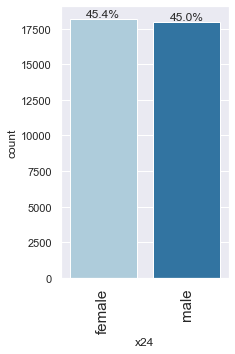

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "x24", perc=True)

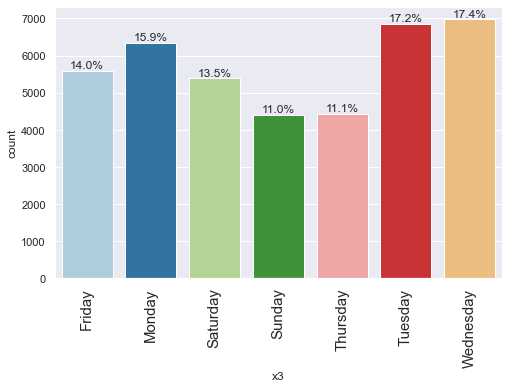

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "x3", perc=True)

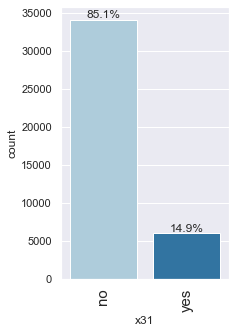

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(data, "x31", perc=True)

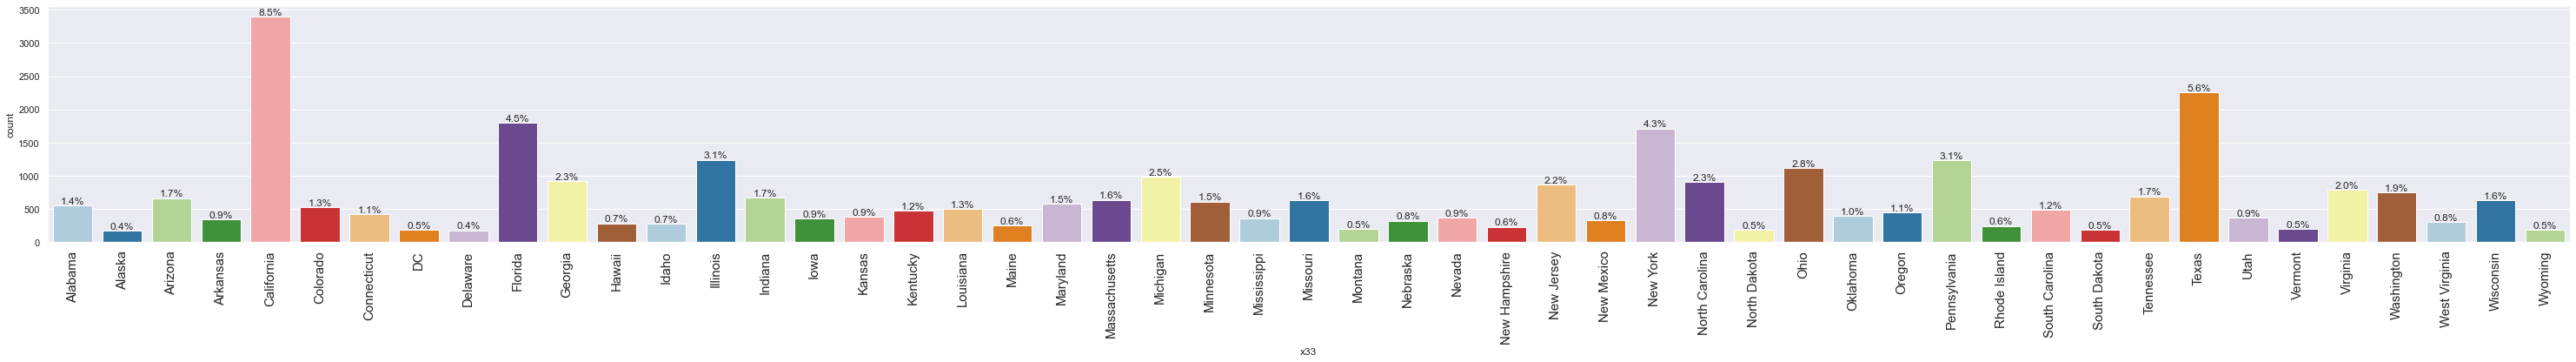

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "x33", perc=True)

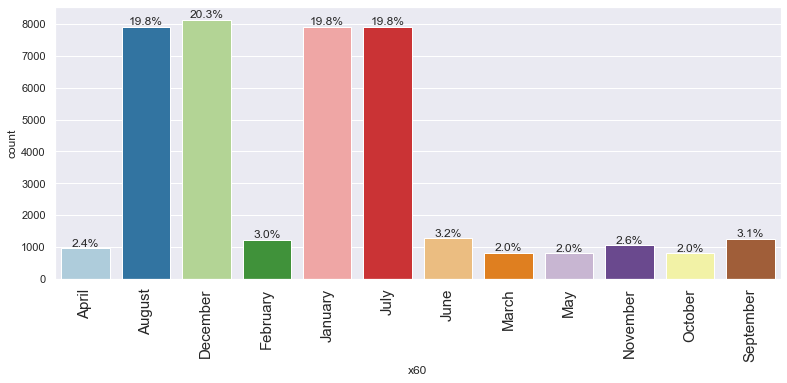

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "x60", perc=True)

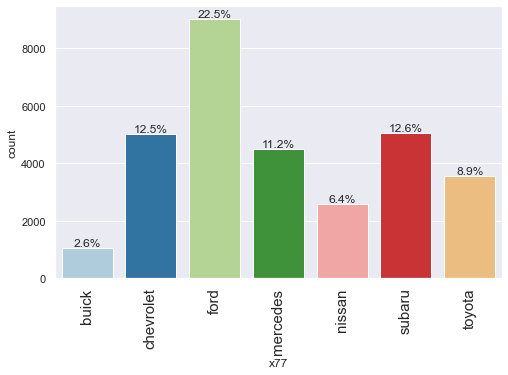

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "x77", perc=True)

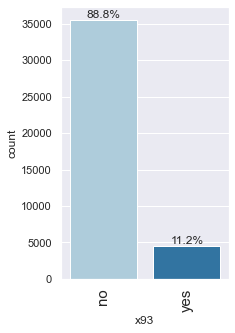

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "x93", perc=True)

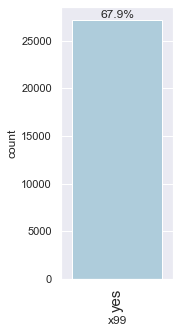

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(data, "x99", perc=True)

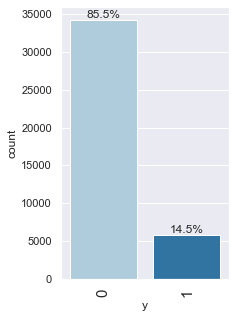

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data, "y", perc=True)

In [45]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

y              0     1    All
x3                           
All        34197  5803  40000
Wednesday   6020   953   6973
Friday      4674   921   5595
Monday      5458   886   6344
Saturday    4514   869   5383
Tuesday     6068   795   6863
Sunday      3663   745   4408
Thursday    3800   634   4434
------------------------------------------------------------------------------------------------------------------------


<Figure size 216x288 with 0 Axes>

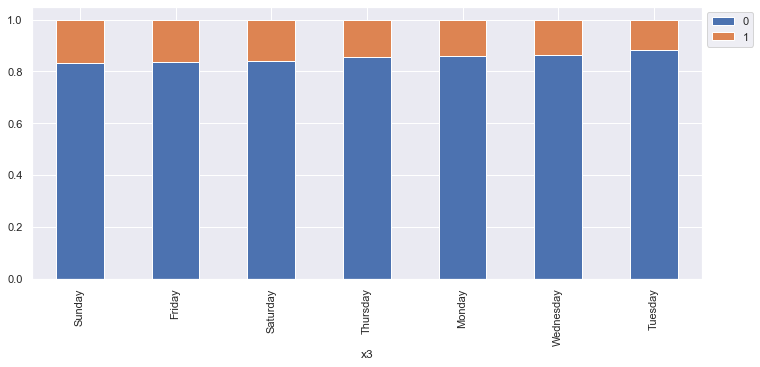

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(3, 4))
stacked_barplot(data, "x3", "y")
plt.show()

y              0     1    All
x77                          
All        26263  4480  30743
ford        7686  1319   9005
subaru      4309   738   5047
chevrolet   4292   719   5011
mercedes    3869   625   4494
toyota      3021   534   3555
nissan      2187   388   2575
buick        899   157   1056
------------------------------------------------------------------------------------------------------------------------


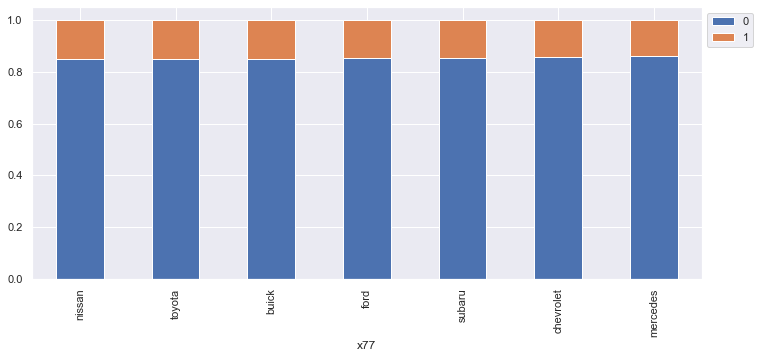

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "x77", "y")

y              0     1    All
x60                          
All        34197  5803  40000
January     6735  1187   7922
August      6757  1150   7907
December    6992  1144   8136
July        6781  1131   7912
September   1051   194   1245
February    1035   178   1213
June        1097   175   1272
November     883   160   1043
April        814   137    951
March        679   128    807
October      672   121    793
May          701    98    799
------------------------------------------------------------------------------------------------------------------------


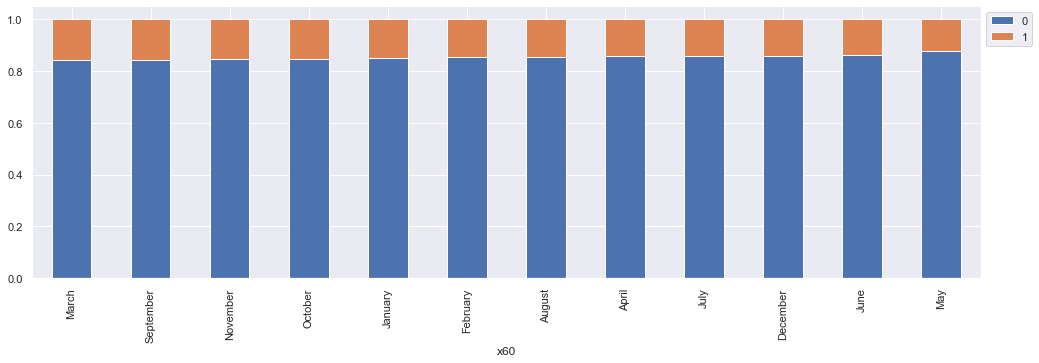

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "x60", "y")
plt.show()

y                   0     1    All
x33                               
All             28043  4786  32829
California       3014   379   3393
Florida          1472   330   1802
Texas            1966   286   2252
Illinois         1004   236   1240
New York         1485   229   1714
Ohio              918   196   1114
Washington        555   195    750
North Carolina    718   192    910
Georgia           745   173    918
Pennsylvania     1092   141   1233
Oregon            327   125    452
Indiana           562   112    674
Missouri          522   112    634
Michigan          875   107    982
New Jersey        775    95    870
South Carolina    406    85    491
Idaho             193    84    277
Massachusetts     555    83    638
Kansas            295    83    378
Wisconsin         555    80    635
Kentucky          399    79    478
Arizona           587    78    665
Tennessee         615    75    690
Virginia          717    74    791
Minnesota         538    73    611
Iowa              28

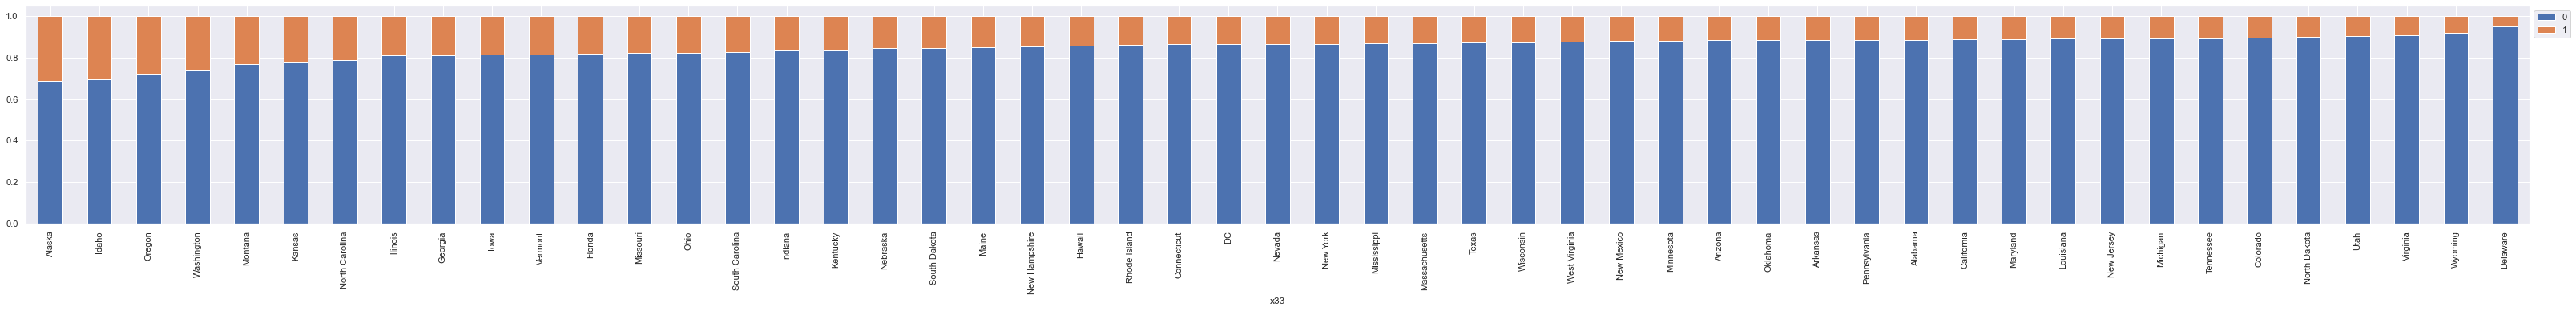

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "x33", "y")

y              0     1    All
x3                           
All        34197  5803  40000
Wednesday   6020   953   6973
Friday      4674   921   5595
Monday      5458   886   6344
Saturday    4514   869   5383
Tuesday     6068   795   6863
Sunday      3663   745   4408
Thursday    3800   634   4434
------------------------------------------------------------------------------------------------------------------------


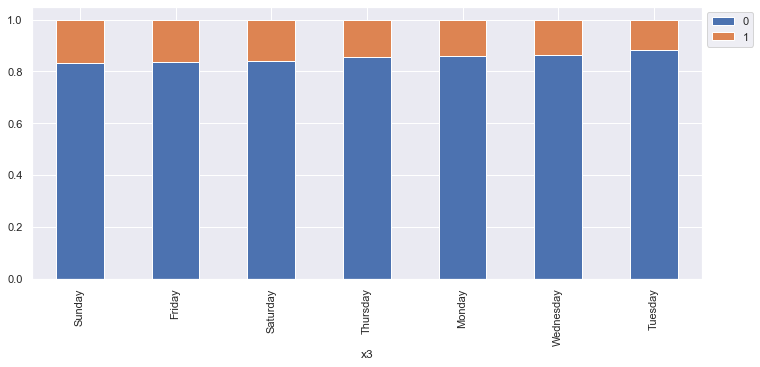

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "x3", "y")

y        0     1    All
x31                    
All  34197  5803  40000
no   28680  5342  34022
yes   5517   461   5978
------------------------------------------------------------------------------------------------------------------------


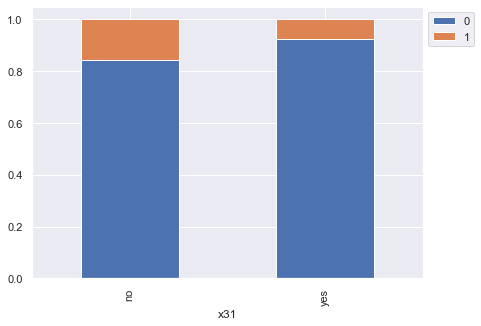

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "x31", "y")

In [52]:
data = data.drop(["x39"], axis=1)
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wednesday,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,-908.650758,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,-1864.962288,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,-543.187403,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,-182.626381,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,

<IPython.core.display.Javascript object>

## Outlier detection

In [53]:
"""""
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.float).columns.tolist()
# dropping release_year as it is a temporal variable
# numeric_columns.remove("y")

plt.figure(figsize=(21, 18))
for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 10, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


plt.show()
"""

'""\n# outlier detection using boxplot\nnumeric_columns = data.select_dtypes(include=np.float).columns.tolist()\n# dropping release_year as it is a temporal variable\n# numeric_columns.remove("y")\n\nplt.figure(figsize=(21, 18))\nfor i, variable in enumerate(numeric_columns):\n    plt.subplot(10, 10, i + 1)\n    plt.boxplot(data[variable], whis=1.5)\n    plt.tight_layout()\n    plt.title(variable)\n\n\nplt.show()\n'

<IPython.core.display.Javascript object>

**Observations**
- There are a few outliers in the data.
- However, we will not treat them as they are proper values and most variables appear to be symmetrical and suggest normality assumptions for regression can be applied

In [54]:
# data.drop(["x39"], inplace=True, axis=1)

<IPython.core.display.Javascript object>

- x39 only has only 1 level and will not create any variance in the data and can therefore be removed.

In [55]:
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wednesday,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,-908.650758,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,-1864.962288,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,-543.187403,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,-182.626381,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,

<IPython.core.display.Javascript object>

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* The dataset has 5000 rows and 100 columns of data.
* A train data has been provided with a test dataset. The split appears to be 0.75:0.25. The test data set doesn't have the target y
* There are null values in the dataset which will be imputed after splitting the dataset.
* We have a mixture of object and numerical data type

**Data Cleaning:**

* We removed special characters from two vairables and converted to to float.
* x39 only has one value accross all rows and can be dropped
* x99 only has one value accross all rows but wasn't dropped because it is has missing values


**Observations from EDA:**
* `x60`: appears to represent months of the year with December and January having the highest amount of observations followed by August and July
* `x77`: appears to represent car manufacturers with Ford leading the number of cases followed by Subaru and Chevrolet
* `x33`: appear to be a variable representing states with California and Texas dominating and New York coming next. Wyoming and Alaska only represent aabout 1% of all observations.
* `x3` : represents days of the week with Wednesday, Tuesday, and Monday accounting for about 30% of all cases.
* Some variables have a much higher scale than others.
* `x45`' :  has a maean value similar to its standard deviation with 25th, 50th and 75th percentile values being similar. This suggest the data type should be explored further 
* `x98, y,x31` show a signigificant difference between the two classes they represent with `x98` only showing one class
* `None of the categorical variables explored showed they could distingush between various classes of the response, y except for the variable representing states and days of the week by a very small amount
* `x24` : appears to be gender with equal representation  of male and females of about 45% each
- Looking at the values of 75th percentile and maximum, we can see there are outliers in many variables like `x21,  x25,x29,x32,x35,x38,x50,x52,,x55, x75, x73,x84, x83,x38, x94,x92,x91,x89`, many more. This should represent the natuaral variation in the datasets and therefore outliers, should not be a problem in this dataset
* `x87,x82`: have negative mean and median
* `x79`: has first, second and third quartile values all equal to 1 which is also strange
* `x41`:has magnitude is much higher than other variables sugesting we could normalize some variables, but without knowing their unit of measurement, we might simply deal will missing values and take a second lookLesser salary hike also contributes to attrition.
* `y`: There's an imbalance in the data with 14.5% of the observations belonging to the positive class we are interested in predicting while the rest belongs to the other class. attriting and rest not.


## Data Pre-Processing

In [56]:
# separating the independent and dependent variables
X = data.drop(["y"], axis=1)
Y = data["y"]
# adding constant
X = sm.add_constant(X)



<IPython.core.display.Javascript object>

In [57]:
X.shape

(40000, 100)

<IPython.core.display.Javascript object>

In [58]:
data.shape

(40000, 100)

<IPython.core.display.Javascript object>

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**

In [63]:
# separating the independent and dependent variables
X = data.drop(["y"], axis=1)
y = data["y"]
# Set the positive class to be class 1
positive_class = 1
y_binary = (y == positive_class).astype(int)

# adding constant
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)


# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y_binary, test_size=0.25, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [64]:
X_train.shape

(30000, 171)

<IPython.core.display.Javascript object>

In [66]:
# Dividing test data into X_test and y_test
X_test = data_test


<IPython.core.display.Javascript object>

In [67]:
X_test.shape

(10000, 100)

<IPython.core.display.Javascript object>

In [68]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of validation set : ", X_val.shape)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set isn't given and will be predicted:")

Shape of Training set :  (30000, 171)
Shape of test set :  (10000, 100)
Shape of validation set :  (10000, 171)
Percentage of classes in validation set:
0    0.8549
1    0.1451
Name: y, dtype: float64
Percentage of classes in training set:
0    0.854933
1    0.145067
Name: y, dtype: float64
Percentage of classes in test set isn't given and will be predicted:


<IPython.core.display.Javascript object>

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 171 entries, const to x93_yes
dtypes: float64(89), int64(2), uint8(80)
memory usage: 30.8 MB


<IPython.core.display.Javascript object>

### Missing-Value Treatment
* We will use mode to impute missing values since we were instructed not to create new data
* Another way to deal with missing values in categorical labels would have been replacing NAs with Unknown and create a new category since some people might not want to discolse their gender especially if it doesn't fit in the typicaly male or female category or if they could be biased against.

In [70]:
# Let's impute the missing values
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
# X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)


<IPython.core.display.Javascript object>

In [72]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

const                 0
x1                    0
x2                    0
x4                    0
x5                    0
x6                    0
x7                    0
x8                    0
x9                    0
x10                   0
x11                   0
x12                   0
x13                   0
x14                   0
x15                   0
x16                   0
x17                   0
x18                   0
x19                   0
x20                   0
x21                   0
x22                   0
x23                   0
x25                   0
x26                   0
x27                   0
x28                   0
x29                   0
x30                   0
x32                   0
x34                   0
x35                   0
x36                   0
x37                   0
x38                   0
x40                   0
x41                   0
x42                   0
x43                   0
x44                   0
x45                   0
x46             

<IPython.core.display.Javascript object>

In [73]:
X_train.head()  # Check the data head of X_train after missing value treatment

,const,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes
0,1.0,5.020537,22.116518,1.459753,1.215372,0.290585,0.0005,-0.451459,5.109683,0.773855,108.372142,-0.278967,2.777622,1.045358,-0.944884,101.292716,5.647863,77.604927,1236.296334,3.156318,3.052530,53.670345,0.598452,3.292535,0.842714,953.186402,17.142942,0.842596,-0.489898,0.050925,47.155814,0.797950,67.527061,32.044462,12.703529,18.636736,101293.331389,1.818355,1.529030,0.944629,-0.683137,0.190462,53.417733,58.458665,7.140405,2.549742,0.259520,-3.788576,79.758171,2.966853,4.050945,-0.439167,13.882758,300.629990,0.0,4.622855,3.440619,-1.051097,44.171475,0.965420,14.402071,10.382335,-1.760113,0.187008,-0.000234,53.199646,4.262180,-1.343424,-1.031372,-1.648556,49.681839,1.0,15.350793,-0.526781,-2.287158,0.689505,2.138771,98.587583,51.076085,2.237882,-0.637141,20.065524,2.239218,0.494641,0.730640,2.807950,0.057796,9.953984,6.498930,1.0,102.822118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.039823,20.681966,1.925607,-0.395540,-1.889911,0.0030,0.848511,4.123980,0.795907,75.728670,5.250698,3.423323,0.886420,-0.603662,104.753426,10.271286,89.196467,-2.623164,5.094615,1.539321,86.311729,-0.441616,5.236456,-0.331585,1299.914360,10.744716,1.541418,-0.489898,0.651912,53.067601,0.402864,73.554342,31.523079,12.703529,14.991948,94236.454769,-1.153646,-1.242544,0.944629,-0.962169,-1.711248,50.476200,66.749407,11.057313,4313.367260,0.107916,2.561762,62.070897,-2.789586,5.650836,0.699731,13.882758,300.629990,0.0,4.244416,-0.079754,-2.256297,54.133960,-3.217716,14.402071,11.281284,-0.212184,1.283715,-0.000234,56.572014,12.037885,-1.663264,-1.031372,-1.141930,56.701406,1.0,6.699231,-2.816464,-6.445551,3.778484,2.138771,86.766492,51.935875,-1.613371,-0.227082,6.118966,2.784946,1.606121,7.220910,4.096135,-3.039054,11.549606,11.955423,1.0,102.887760,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.597255,18.708570,-0.674986,0.567875,-0.192760,0.0101,-0.392349,1.516602,1.556739,73.264976,-1.092710,2.427209,0.409952,-2.524058,104.692527,6.579632,78.302315,1973.179350,4.032728,-0.030219,48.976060,-0.162934,4.388443,0.794665,814.946295,17.723774,0.769363,-0.48989

<IPython.core.display.Javascript object>

In [ ]:
# Creating dummy variables for categorical variables
# X_train = pd.get_dummies(data=X_train, drop_first=True)
# X_val = pd.get_dummies(data=X_val, drop_first=True)
# X_test = pd.get_dummies(data=X_test, drop_first=True)

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting an observation in class 0 but in reality, it belonged to class 1.
2. Predicting an observation belongs to 1, but in reality it belonged to class 0. 

### Which case is more important? 
* Both the cases are important as:

* However based on the prompt and it being an insurance company, we are interested correctly predicting and classifying the positive class which could be whether a fraudulent claim is filed. We would want to reduce the cost of misclassifying an observation in the positive class 

### How to reduce the losses?

* Without having full context we would want the ROC-AUC value  and  `F1 Score` to come up with the best algorith. Visualization, structure of the algorithm as well as underlying assumptions will also help deciding which model is best. The greater the F1  score higher are the chances of minimizing False Negatives and False Positives which is a goal for most classification problems

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [74]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [75]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [81]:
# reset indices of y_train and X_train
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

# fitting logistic regression model
logit = sm.Logit(
    y_train, X_train.astype(float), multi_class="ovr", class_weight="balanced"
)
lg = logit.fit(disp=False)
print(lg.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29829
Method:                           MLE   Df Model:                          170
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.1573
Time:                        05:17:47   Log-Likelihood:                -10468.
converged:                       True   LL-Null:                       -12422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.6863      3.018      1.553      0.120      -1.229      10.602
x1                     0.0118      0.010      1.229      0.219      -0.007       0.031
x2                  

<IPython.core.display.Javascript object>

In [82]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.860467,0.119945,0.594533,0.199618


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that the probability of class 1 decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of class 1increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Multicollinearity

In [83]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [84]:
checking_vif(X_train)

,feature,VIF
0,const,29079.451252
1,x1,1.167668
2,x2,12.336011
3,x4,1.809845
4,x5,2.114537
5,x6,2.368955
6,x7,1.005968
7,x8,5.158396
8,x9,3.346620
9,x10,1.657506


<IPython.core.display.Javascript object>

* x2, x28, x36, x37, x47, show very high correlation while x18, x72, and x82 show moderately high correlation. 
* These will be explored further looking at p-values and creating a for loop removing one variable at a time

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [85]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'x2', 'x7', 'x8', 'x11', 'x13', 'x15', 'x18', 'x19', 'x20', 'x28', 'x36', 'x37', 'x40', 'x46', 'x47', 'x50', 'x51', 'x54', 'x61', 'x62', 'x64', 'x66', 'x73', 'x80', 'x82', 'x86', 'x87', 'x89', 'x100', 'x3_Monday', 'x3_Thursday', 'x3_Tuesday', 'x3_Wednesday', 'x31_yes', 'x33_Alaska', 'x33_Arizona', 'x33_California', 'x33_Delaware', 'x33_Florida', 'x33_Georgia', 'x33_Idaho', 'x33_Illinois', 'x33_Indiana', 'x33_Iowa', 'x33_Kansas', 'x33_Kentucky', 'x33_Missouri', 'x33_Montana', 'x33_North Carolina', 'x33_Ohio', 'x33_Oregon', 'x33_Tennessee', 'x33_Virginia', 'x33_Washington', 'x60_March', 'x65_progressive', 'x93_yes']


<IPython.core.display.Javascript object>

In [88]:
# feeding significant features with lower vif values into new Xtrain and Xval
X_train1 = X_train[selected_features]
X_val1 = X_val[selected_features]

<IPython.core.display.Javascript object>

In [ ]:
X_train1.shape

In [89]:
# Fitting new model with variables which are not very collinear
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29942
Method:                           MLE   Df Model:                           57
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.1526
Time:                        05:20:49   Log-Likelihood:                -10526.
converged:                       True   LL-Null:                       -12422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.8347      1.441      4.049      0.000       3.010       8.659
x2                     0.0377      0.015      2.527      0.011       0.008       0.067
x7                  

<IPython.core.display.Javascript object>

In [90]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.860133,0.110524,0.596774,0.186506


<IPython.core.display.Javascript object>

* All the variables left have p-value<0.05 except for x33 Wyoming, x33 Michigan, x33 Washington, x60_March, x3_saturday ehich are dummy variables and cannot be eliminated as well as x98 and x96 which are 0.046 and 0.047 respectively
* So we can say that lg1 is the best model for making any inference without hypertuning
* The accuracy performance on the training data is the same as before dropping the variables with the high p-value.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [91]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,x2,x7,x8,x11,x13,x15,x18,x19,x20,x28,x36,x37,x40,x46,x47,x50,x51,x54,x61,x62,x64,x66,x73,x80,x82,x86,x87,x89,x100,x3_Monday,x3_Thursday,x3_Tuesday,x3_Wednesday,x31_yes,x33_Alaska,x33_Arizona,x33_California,x33_Delaware,x33_Florida,x33_Georgia,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Missouri,x33_Montana,x33_North Carolina,x33_Ohio,x33_Oregon,x33_Tennessee,x33_Virginia,x33_Washington,x60_March,x65_progressive,x93_yes
Odds,341.947102,1.038403,1.747728e-33,1.076108,1.010275,1.025564,0.964302,0.972657,0.999851,0.980180,0.950262,0.967143,1.050126,0.938507,0.935806,0.887992,0.999908,1.048329,1.022262,1.024768,0.940166,0.990593,1.065024,0.988240,1.023433,0.936457,1.019626,0.962111,0.935550,1.008965,0.822587,0.798297,0.602664,0.778493,0.549961,2.761566,0.725807,0.798872,0.356122,1.586892,1.816750,3.551601,1.676078,1.408185,1.548859,2.124678,1.552479,1.616814,2.004271,2.073281,1.428736,3.557532,0.669159,0.652637,2.930460,1.277981,1.108535,0.434667
Change_odd%,34094.710160,3.840320,-1.000000e+02,7.610754,1.027492,2.556423,-3.569837,-2.734302,-0.014872,-1.982037,-4.973765,-3.285700,5.012649,-6.149262,-6.419408,-11.200762,-0.009205,4.832870,2.226172,2.476778,-5.983384,-0.940658,6.502385,-1.176016,2.343336,-6.354270,1.962573,-3.788915,-6.444994,0.896531,-17.741255,-20.170270,-39.733638,-22.150709,-45.003868,176.156605,-27.419286,-20.112844,-64.387829,58.689198,81.675024,255.160112,67.607829,40.818493,54.885883,112.467806,55.247899,61.681414,100.427122,107.328110,42.873605,255.753175,-33.084144,-34.736338,193.046024,27.798134,10.853457,-56.533289


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `x2`: Holding all other features constant a 1 unit change this variable will increase the odds of positive class by 1.04 times or a 4.029% increase in the odds of positive class .
* `x19`: Holding all other features constant a 1 unit change in x19 will increase the odds of positive class by 0.99
* `x7`: Holding all other features constant a 1 unit change in x7 will lead no an insignifacnt change in the odds of the positive class or 0% increase in the odds of the positive class..

* All other variables can be interpreted similarly



#### Checking model performance on the training set

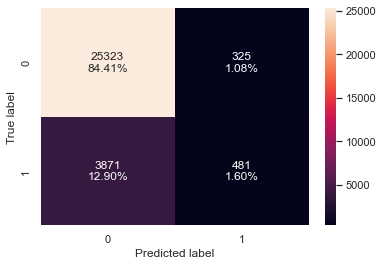

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [93]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.860133,0.110524,0.596774,0.186506


<IPython.core.display.Javascript object>

## Optimal threshold of index giving me maximum TP and FP rates using AUC-ROC curve

#### ROC-AUC
* ROC-AUC on training set

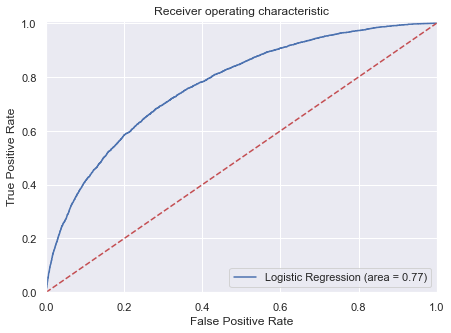

<IPython.core.display.Javascript object>

In [94]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test.
* ROC-AUC score of 0.77 on training is okay but could be better with tuning.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [95]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.15505367598924136


<IPython.core.display.Javascript object>

In [96]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.712967,0.682675,0.291246,0.408301


<IPython.core.display.Javascript object>

**We notice a higher F1 score with the threshold value from 0.18 to 0.40**

#### Let's use Precision-Recall curve and see if we can find a better threshold

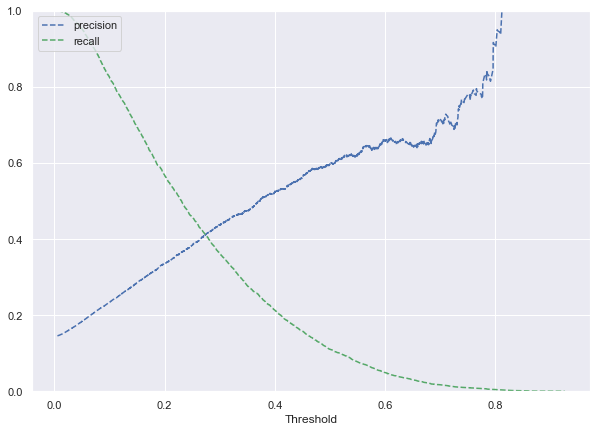

<IPython.core.display.Javascript object>

In [97]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.30 threshold we get a balanced precision and recall.

In [98]:
# setting the threshold
optimal_threshold_curve = 0.30

<IPython.core.display.Javascript object>

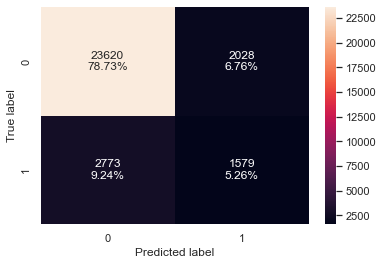

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [100]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839967,0.362822,0.43776,0.396784


<IPython.core.display.Javascript object>

* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

### Let's check the performance on the validation set

**Using model with default threshold of 0.5**

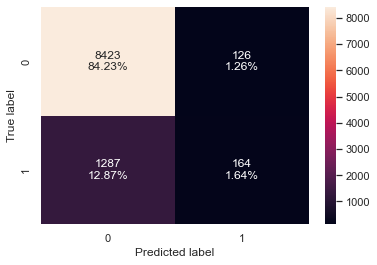

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_val1, y_val)

In [102]:
log_reg_model_val_perf = model_performance_classification_statsmodels(
    lg1, X_val1, y_val
)

print("val performance:")
log_reg_model_val_perf

val performance:


,Accuracy,Recall,Precision,F1
0,0.8587,0.113025,0.565517,0.188397


<IPython.core.display.Javascript object>

In [ ]:
logit_roc_auc_val = roc_auc_score(y_val, lg1.predict(X_val1))
fpr, tpr, thresholds = roc_curve(y_val, lg1.predict(X_val1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.30**

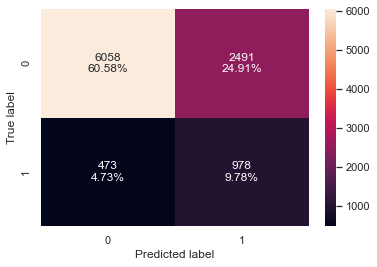

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_val1, y_val, threshold=optimal_threshold_auc_roc)

In [104]:
# checking model performance for this model
log_reg_model_val_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_val1, y_val, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_val_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.7036,0.674018,0.281926,0.397561


<IPython.core.display.Javascript object>

**We notice a higher F1 score with the threshold value from 0.18 to 0.39**

**Using model with threshold = 0.29**

In [105]:
log_reg_model_val_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_val1, y_val, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_val_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.8293,0.358374,0.401235,0.378595


<IPython.core.display.Javascript object>

In [106]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.15 Threshold",
    "Logistic Regression-0.29 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.15 Threshold,Logistic Regression-0.29 Threshold
Accuracy,0.860133,0.712967,0.839967
Recall,0.110524,0.682675,0.362822
Precision,0.596774,0.291246,0.437760
F1,0.186506,0.408301,0.396784


<IPython.core.display.Javascript object>

In [107]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_model_val_perf_threshold_auc_roc.T,
        log_reg_model_val_perf_threshold_curve.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.15 Threshold",
    "Logistic Regression-0.29 Threshold",
]

print("validation performance comparison:")
models_val_comp_df

validation performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.15 Threshold,Logistic Regression-0.29 Threshold
Accuracy,0.858700,0.703600,0.829300
Recall,0.113025,0.674018,0.358374
Precision,0.565517,0.281926,0.401235
F1,0.188397,0.397561,0.378595


<IPython.core.display.Javascript object>

- The best validation recall score is 66.5% and while best precision is 55.8% 
- The best validation F1 score is 40.8% which will isn't bad. 
- So, we will chose the Logistic Regression with 0.29 as the threshold since its metrics are most conservative. 
- This is our final model which we can use with the test set and calculate predictions.

**Now we have our final model, let's find out how our model is performing on unseen test data**

In [ ]:
X_test = data_test
# X_test = data_test.drop(["x39"], inplace=True, axis=1)

In [ ]:
X_test.head()

In [ ]:
""""
# Fit Transform test set and avoid data leakage by imputting without using training data
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

## Non GLM Model

In [108]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [109]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")

<IPython.core.display.Javascript object>

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class 1 is 14.5% and the frequency of class 0 is 84.5%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

**decision tree with class weights**

In [111]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.17, 1: 0.83}, random_state=1
)

<IPython.core.display.Javascript object>

In [112]:
dtree.fit(X_train, y_train)  ##Fitting decision tree

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

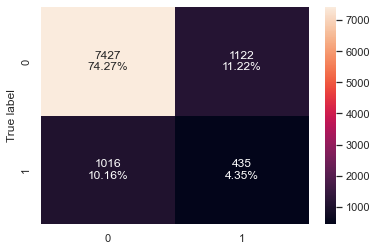

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(dtree, X_val, y_val)

**Confusion Matrix -**

* Observation is in class 1 and the model predicted it correctly :  True Positive (observed=1,predicted=1)

* Oservation is not in class 1 and the model predicted it is : False Positive (observed=0,predicted=1)

* Observation is not in class 1 and the model predicted it is not  : True Negative (observed=0,predicted=0)

* Observation is in class the model predicted it is not : False Negative (observed=1,predicted=0)

In [114]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [116]:
dtree_model_val_perf = model_performance_classification_sklearn(dtree, X_val, y_val)
print("Testing performance \n", dtree_model_val_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0    0.7862  0.299793   0.279383  0.289229


<IPython.core.display.Javascript object>

**Random forest with class weights**

In [117]:
rf_wt = RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

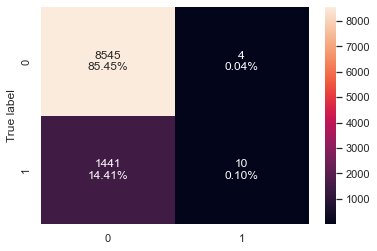

<IPython.core.display.Javascript object>

In [118]:
confusion_matrix_sklearn(rf_wt, X_val, y_val)

In [119]:
rf_wt_model_train_perf = model_performance_classification_sklearn(
    rf_wt, X_train, y_train
)
print("Training performance \n", rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [120]:
rf_wt_model_val_perf = model_performance_classification_sklearn(rf_wt, X_val, y_val)
print("Validation performance \n", rf_wt_model_val_perf)

Validation performance 
    Accuracy    Recall  Precision        F1
0    0.8555  0.006892   0.714286  0.013652


<IPython.core.display.Javascript object>

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [133]:
%%time
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

#Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1,3,5,10],
              'max_leaf_nodes' : [2, 3, 9, 15],
              'min_impurity_decrease': [0.0001,0.01,0.1,1]
             }

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
grid_obj = RandomizedSearchCV(estimator=dtree_estimator,param_distributions = parameters , scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train, y_train)
#Print the best combination of parameters
grid_obj.best_params_

print("Best parameters are {} with CV score={}:".format(grid_obj.best_params_,grid_obj.best_score_))

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

Best parameters are {'min_samples_leaf': 5, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 9, 'max_depth': 18} with CV score=0.6742101165261227:
CPU times: total: 16.8 s
Wall time: 1min 7s


DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

<IPython.core.display.Javascript object>

In [134]:
grid_obj.best_score_

0.6742101165261227

<IPython.core.display.Javascript object>

In [135]:
# Creating new pipeline with best parameters
tuned_dtree = DecisionTreeClassifier(
    min_samples_leaf=5, min_impurity_decrease=0.0001, max_leaf_nodes=9, max_depth=29,
)

tuned_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=29, max_leaf_nodes=9,
                       min_impurity_decrease=0.0001, min_samples_leaf=5)

<IPython.core.display.Javascript object>

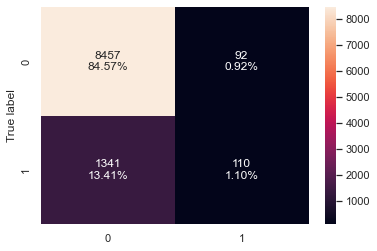

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(tuned_dtree, X_val, y_val)

In [137]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    tuned_dtree, X_train, y_train
)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0    0.8566  0.079044   0.539185  0.137876


<IPython.core.display.Javascript object>

In [138]:
dtree_estimator_model_val_perf = model_performance_classification_sklearn(
    tuned_dtree, X_val, y_val
)
print("validation performance \n", dtree_estimator_model_val_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0    0.8567  0.07581   0.544554  0.133091


<IPython.core.display.Javascript object>

**Tuning Random Forest**

In [ ]:

%%time
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [100,200],
        "min_samples_leaf": np.arange(1,2,1),
        "max_features": [0.1,'log2',0.5],
        "max_samples": np.arange(0.3, 0.7),
}


#Calling RandomizedSearchCV
grid_obj = RandomizedSearchCV(estimator=rf_estimator,param_distributions = parameters , scoring=scorer, n_iter=30, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train, y_train)
# Print the best combination of parameters
grid_obj.best_params_
print("Best parameters are {} with CV score={}:" .format(grid_obj.best_params_,grid_obj.best_score_))


In [139]:
# Creating new pipeline with best parameters
tuned_rf = RandomForestClassifier(
    min_samples_leaf=5, min_impurity_decrease=0.0001, max_leaf_nodes=9, max_depth=29,
)

tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=29, max_leaf_nodes=9,
                       min_impurity_decrease=0.0001, min_samples_leaf=5)

<IPython.core.display.Javascript object>

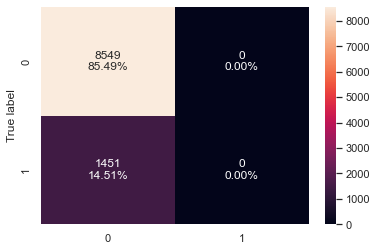

<IPython.core.display.Javascript object>

In [140]:
confusion_matrix_sklearn(tuned_rf, X_val, y_val)

In [141]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0  0.854933     0.0        0.0  0.0


<IPython.core.display.Javascript object>

In [142]:
rf_estimator_model_val_perf = model_performance_classification_sklearn(
    tuned_rf, X_val, y_val
)
print("Testing performance \n", rf_estimator_model_val_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0    0.8549     0.0        0.0  0.0


<IPython.core.display.Javascript object>

### Comparing all the models

## Feature importance ...

In [155]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        tuned_dtree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
x7                  0.545423
x4                  0.250184
x47                 0.158397
x40                 0.045995
const               0.000000
x33_Massachusetts   0.000000
x33_Indiana         0.000000
x33_Iowa            0.000000
x33_Kansas          0.000000
x33_Kentucky        0.000000
x33_Louisiana       0.000000
x33_Maine           0.000000
x33_Maryland        0.000000
x33_Minnesota       0.000000
x33_Michigan        0.000000
x33_Idaho           0.000000
x33_Mississippi     0.000000
x33_Missouri        0.000000
x33_Montana         0.000000
x33_Nebraska        0.000000
x33_Nevada          0.000000
x33_New Hampshire   0.000000
x33_Illinois        0.000000
x33_Georgia         0.000000
x33_Hawaii          0.000000
x31_yes             0.000000
x100                0.000000
x3_Monday           0.000000
x3_Saturday         0.000000
x3_Sunday           0.000000
x3_Thursday         0.000000
x3_Tuesday          0.000000
x3_Wednesday        0.000000
x24_male      

<IPython.core.display.Javascript object>

In [156]:
feature_names = X_train.columns

<IPython.core.display.Javascript object>

## Saving results as GLM vs non-GLM

**My approach to creating the last deliverable which is saving my predictions in one cloumn will be using the code structure below**
**The results should only be a column with possible TP, and TN to demonstrate errors in misclasification 
**Thank you for the opportunity to work on this dataset**


In [ ]:


"""
- create predictions for GLM model
glm_probs = glm_model.predict_proba(test_data)[:, 1]

- save GLM predictions to file
np.savetxt('glmresults.csv', glm_probs, delimiter=',', fmt='%.5f')

- load non-GLM model
with open('nonglm_model.pkl', 'rb') as f:
    nonglm_model = pickle.load(f)

- create predictions for non-GLM model
nonglm_probs = nonglm_model.predict_proba(test_data)[:, 1]
using

y_predict = tuned_dtree.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

-  save non-GLM predictions to file
np.savetxt('nonglmresults.csv', nonglm_probs, delimiter=',', fmt='%.5f')
"""